In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib

In [2]:
train_url = 'train.csv'
gender_submission_url = 'gender_submission.csv'
test_url = 'test.csv'

In [3]:
df = pd.read_csv(train_url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Let's look more closely at the data

In [4]:
print('There are',df['PassengerId'].count(),'pieces of passenger data (by PassengerId)')
print('-------')
print('There are',df[df["Pclass"]==1]['Pclass'].count(),'people in upper social class')
print('There are',df[df["Pclass"]==2]['Pclass'].count(),'people in middle social class')
print('There are',df[df["Pclass"]==3]['Pclass'].count(),'people in lower social class')
print('-------')
print('There are',df[df["SibSp"]==0]['SibSp'].count(),'people with no siblings or spouses aboard')
print('There are',df[df["SibSp"]>=1]['SibSp'].count(),'people with siblings or spouses aboard')
print('-------')

There are 891 pieces of passenger data (by PassengerId)
-------
There are 216 people in upper social class
There are 184 people in middle social class
There are 491 people in lower social class
-------
There are 608 people with no siblings or spouses aboard
There are 283 people with siblings or spouses aboard
-------


## Now to clean the data

Change Gender male to 0, female to 1

In [5]:
df['Sex'].replace('male',0,inplace=True)
df['Sex'].replace('female',1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


We will drop:

Ticket, Name, PassengerId 

as they are probably not important in training the model

In [6]:
df = df.drop(["Ticket","Name","PassengerId"],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,S
1,1,1,1,38.0,1,0,71.2833,C85,C
2,1,3,1,26.0,0,0,7.9250,NaN,S
3,1,1,1,35.0,1,0,53.1000,C123,S
4,0,3,0,35.0,0,0,8.0500,NaN,S


We will remove cabin here for now, because it needs further data manipulation because of their alphabets and  irregular data. We can choose to use Excel or other spreadsheets to view and clean data if we wish.

Cabin is important to because it shows us their positions in the ship when Titanic went down at night

In [7]:
df = df.drop(["Cabin"],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


Now the data looks almost clean and all in numerical 'weights'. 
We will change the emarked to numbers as well

Southampton = S = 0,
Cherbourg = C = 1,
Queenstown = Q = 2

In [8]:
df['Embarked'].replace('S',0,inplace=True)
df['Embarked'].replace('C',1,inplace=True)
df['Embarked'].replace('Q',1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


We will now erase all rows of data with EMPTY or NaN values

In [9]:
df = df.dropna()
# are there any null values in df left?
df.isnull().values.any()

False

# Data Analysis and visualization

In [10]:
# Age vs survival

# the last ["EMbarked is just to take any of the count number"]
# less than 10 years old
y_1_m_s = df[(df["Age"]<10) & (df["Sex"]==0) & (df["Survived"]==1)]["Embarked"].count()
y_1_m_d = df[(df["Age"]<10) & (df["Sex"]==0) & (df["Survived"]==0)]["Embarked"].count()
y_1_f_s = df[(df["Age"]<10) & (df["Sex"]==1) & (df["Survived"]==1)]["Embarked"].count()
y_1_f_d = df[(df["Age"]<10) & (df["Sex"]==1) & (df["Survived"]==0)]["Embarked"].count()
# >= 10 y/o
y_2_m_s = df[(df["Age"]>=10) & (df["Age"]<20) & (df["Sex"]==0) & (df["Survived"]==1)]["Embarked"].count()
y_2_f_s = df[(df["Age"]>=10) & (df["Age"]<20) & (df["Sex"]==1) & (df["Survived"]==1)]["Embarked"].count()
y_2_m_d = df[(df["Age"]>=10) & (df["Age"]<20) & (df["Sex"]==0) & (df["Survived"]==0)]["Embarked"].count()
y_2_f_d = df[(df["Age"]>=10) & (df["Age"]<20) & (df["Sex"]==1) & (df["Survived"]==0)]["Embarked"].count()
# >= 20 y/o
y_3_m_s = df[(df["Age"]>=20) & (df["Age"]<30) & (df["Sex"]==0) & (df["Survived"]==1)]["Embarked"].count()
y_3_f_s = df[(df["Age"]>=20) & (df["Age"]<30) & (df["Sex"]==1) & (df["Survived"]==1)]["Embarked"].count()
y_3_m_d = df[(df["Age"]>=20) & (df["Age"]<30) & (df["Sex"]==0) & (df["Survived"]==0)]["Embarked"].count()
y_3_f_d = df[(df["Age"]>=20) & (df["Age"]<30) & (df["Sex"]==1) & (df["Survived"]==0)]["Embarked"].count()
# >= 30 y/o
y_4_m_s = df[(df["Age"]>=30) & (df["Age"]<40) & (df["Sex"]==0) & (df["Survived"]==1)]["Embarked"].count()
y_4_f_s = df[(df["Age"]>=30) & (df["Age"]<40) & (df["Sex"]==1) & (df["Survived"]==1)]["Embarked"].count()
y_4_m_d = df[(df["Age"]>=30) & (df["Age"]<40) & (df["Sex"]==0) & (df["Survived"]==0)]["Embarked"].count()
y_4_f_d = df[(df["Age"]>=30) & (df["Age"]<40) & (df["Sex"]==1) & (df["Survived"]==0)]["Embarked"].count()
# >= 40 y/o
y_5_m_s = df[(df["Age"]>=40) & (df["Age"]<50) & (df["Sex"]==0) & (df["Survived"]==1)]["Embarked"].count()
y_5_f_s = df[(df["Age"]>=40) & (df["Age"]<50) & (df["Sex"]==1) & (df["Survived"]==1)]["Embarked"].count()
y_5_m_d = df[(df["Age"]>=40) & (df["Age"]<50) & (df["Sex"]==0) & (df["Survived"]==0)]["Embarked"].count()
y_5_f_d = df[(df["Age"]>=40) & (df["Age"]<50) & (df["Sex"]==1) & (df["Survived"]==0)]["Embarked"].count()
# >= 50 y/o
y_6_m_s = df[(df["Age"]>=50) & (df["Age"]<60) & (df["Sex"]==0) & (df["Survived"]==1)]["Embarked"].count()
y_6_f_s = df[(df["Age"]>=50) & (df["Age"]<60) & (df["Sex"]==1) & (df["Survived"]==1)]["Embarked"].count()
y_6_m_d = df[(df["Age"]>=50) & (df["Age"]<60) & (df["Sex"]==0) & (df["Survived"]==0)]["Embarked"].count()
y_6_f_d = df[(df["Age"]>=50) & (df["Age"]<60) & (df["Sex"]==1) & (df["Survived"]==0)]["Embarked"].count()
# >= 60 y/o
y_7_m_s = df[(df["Age"]>=60) & (df["Age"]<70) & (df["Sex"]==0) & (df["Survived"]==1)]["Embarked"].count()
y_7_f_s = df[(df["Age"]>=60) & (df["Age"]<70) & (df["Sex"]==1) & (df["Survived"]==1)]["Embarked"].count()
y_7_m_d = df[(df["Age"]>=60) & (df["Age"]<70) & (df["Sex"]==0) & (df["Survived"]==0)]["Embarked"].count()
y_7_f_d = df[(df["Age"]>=60) & (df["Age"]<70) & (df["Sex"]==1) & (df["Survived"]==0)]["Embarked"].count()
# >= 70 y/o
y_8_m_s = df[(df["Age"]>=70) & (df["Sex"]==0) & (df["Survived"]==1)]["Embarked"].count()
y_8_f_s = df[(df["Age"]>=70) & (df["Sex"]==1) & (df["Survived"]==1)]["Embarked"].count()
y_8_m_d = df[(df["Age"]>=70) & (df["Sex"]==0) & (df["Survived"]==0)]["Embarked"].count()
y_8_f_d = df[(df["Age"]>=70) & (df["Sex"]==1) & (df["Survived"]==0)]["Embarked"].count()

men_survive = (y_1_m_s ,y_2_m_s ,y_3_m_s ,y_4_m_s, y_5_m_s, y_6_m_s ,y_7_m_s ,y_8_m_s )
women_survive = (y_1_f_s ,y_2_f_s ,y_3_f_s ,y_4_f_s, y_5_f_s, y_6_f_s ,y_7_f_s ,y_8_f_s )
men_no_survive = (y_1_m_d,y_2_m_d,y_3_m_d,y_4_m_d,y_5_m_d,y_6_m_d,y_7_m_d,y_8_m_d,)
women_no_survive = (y_1_f_d,y_2_f_d,y_3_f_d,y_4_f_d,y_5_f_d,y_6_f_d,y_7_f_d,y_8_f_d,)

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
n_groups = 8
fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, men_survive, bar_width, bottom=None,
                alpha=opacity, color='#2db721',
                error_kw=error_config,
                label='Men Survive')
rects2 = ax.bar(index, women_survive, bar_width,bottom=None,
                alpha=opacity, color='#adaa1b',
                error_kw=error_config,
                label='women Survive')
rects3 = ax.bar(index+bar_width, men_no_survive, bar_width,bottom=None,
                alpha=opacity, color='#000000',
                error_kw=error_config,
                label="Men didn't make it")
rects4 = ax.bar(index+bar_width, women_no_survive, bar_width,bottom=None,
                alpha=opacity, color='r',
                error_kw=error_config,
                label="Women didn't make it")

ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Count of Survival by age group and gender')
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(('<10', '>=10', '>=20', '>=30', '>=40', '>=50', '>=60', '>=70'),fontsize=12)
ax.legend()
fig.tight_layout()
plt.show()


<Figure size 1000x500 with 1 Axes>

## Social class vs Survival

In [12]:
# the last ["EMbarked is just to take any of the count number"]
social_1_s = df[(df['Pclass']==1) & (df['Survived']==1)]['Embarked'].count()
social_2_s = df[(df['Pclass']==2) & (df['Survived']==1)]['Embarked'].count()
social_3_s = df[(df['Pclass']==3) & (df['Survived']==1)]['Embarked'].count()
social_1_d = df[(df['Pclass']==1) & (df['Survived']==0)]['Embarked'].count()
social_2_d = df[(df['Pclass']==2) & (df['Survived']==0)]['Embarked'].count()
social_3_d = df[(df['Pclass']==3) & (df['Survived']==0)]['Embarked'].count()


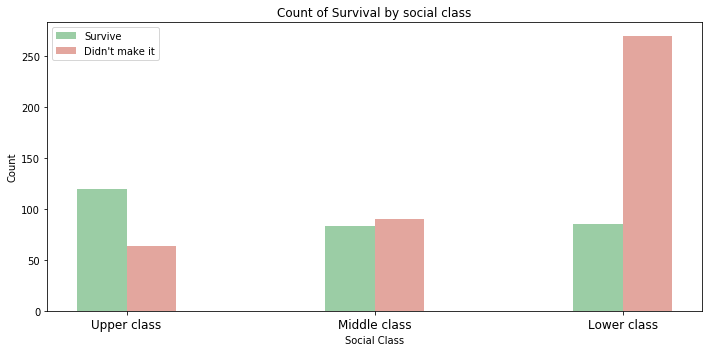

In [13]:
n_groups = 3
fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.4
error_config = {'ecolor': '0.3'}

a = (social_1_s,social_2_s,social_3_s)
b = (social_1_d,social_2_d,social_3_d)
rects1 = ax.bar(index, a, bar_width, bottom=None,
                alpha=opacity, color='#05821e',
                error_kw=error_config,
                label='Survive')
rects2 = ax.bar(index+bar_width,b, bar_width,bottom=None,
                alpha=opacity, color='#ba210d',
                error_kw=error_config,
                label="Didn't make it")

ax.set_xlabel('Social Class')
ax.set_ylabel('Count')
ax.set_title('Count of Survival by social class')
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(('Upper class','Middle class','Lower class'),fontsize=12)
ax.legend()
fig.tight_layout()
plt.show()

# Time to train our AI Models

================================================================

================================================================

================================================================

================================================================

================================================================

Preparing the training data

In [14]:
x = df.drop(["Survived"],axis=1)
y = df["Survived"]

# The below is used to split a df into test and train sets.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)


In [15]:
def train_model(x_train,y_train,layer_shape,optimizer):
    # layer shape is in a python list [20,20,20]
    #solver options => solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
    model = MLPClassifier(hidden_layer_sizes=(layer_shape), max_iter=6000, alpha=0.000000001,
                         solver=optimizer, verbose=True,random_state=21,tol=0.000000001,learning_rate="adaptive")
    model.fit(x_train, y_train)
    return model

In [16]:

#optimizer options => solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’ for MLPClassifier and regressor
optimizer = 'adam'
layer_shape = [39,39]
model = train_model(x_train,y_train,layer_shape,optimizer)
y_pred = model.predict(x_test)

Iteration 1, loss = 3.49011030
Iteration 2, loss = 2.91197538
Iteration 3, loss = 2.48506170
Iteration 4, loss = 2.10227236
Iteration 5, loss = 1.76727430
Iteration 6, loss = 1.44805099
Iteration 7, loss = 1.16444680
Iteration 8, loss = 1.01625974
Iteration 9, loss = 0.91592672
Iteration 10, loss = 0.92160160
Iteration 11, loss = 0.92945362
Iteration 12, loss = 0.90834504
Iteration 13, loss = 0.85972675
Iteration 14, loss = 0.80027604
Iteration 15, loss = 0.74531282
Iteration 16, loss = 0.70345915
Iteration 17, loss = 0.67537402
Iteration 18, loss = 0.65865950
Iteration 19, loss = 0.65270696
Iteration 20, loss = 0.63895588
Iteration 21, loss = 0.61975536
Iteration 22, loss = 0.60959582
Iteration 23, loss = 0.60945023
Iteration 24, loss = 0.60519460
Iteration 25, loss = 0.60028100
Iteration 26, loss = 0.59258110
Iteration 27, loss = 0.58786130
Iteration 28, loss = 0.58600374
Iteration 29, loss = 0.58180955
Iteration 30, loss = 0.57902650
Iteration 31, loss = 0.57729021
Iteration 32, los

Check accuracy of model

In [17]:
## accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
accuracy_score(y_test,y_pred)

0.8426966292134831

### Optimizing for a better accuracy
We can then try to increase put accuracy by playing around with the neural network

try

20 x 20 x 20
or any other cominations of layer sizes

In [18]:
def accuracy_optimizer(x_train,y_train,layer_shapes_to_test,optimizer,verbose=False):
    print("Finding Best accuracy layer shape")
    max_acc = 0
    for i,layer_shape in enumerate(layer_shapes_to_test):
        layer_shape = layer_shape
        model = train_model(x_train,y_train,layer_shape,optimizer)
        y_pred = model.predict(x_test)
        ## accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
        accuracy = accuracy_score(y_test,y_pred)
        if verbose == True:
            print("The Hidden Layer shape",layer_shape,"has accuracy of",accuracy)
        if i==0:
            max_acc = accuracy
            max_acc_shape = layer_shape
        elif accuracy > max_acc:
            max_acc = accuracy
            max_acc_shape = layer_shape
    print(max_acc,max_acc_shape)
    f = open("max_accuracy.txt", "w")
    write_str = str(max_acc)+ ":::" +str(max_acc_shape)
    f.write(write_str)
    

#layer_shapes_to_test = [[20],[20,20],[10],[10,10]]
#layer_shapes_to_test = []
#for i in range(20,41):
#    for j in range(20,41):
#        for k in range(20,41):
#            layer_shapes_to_test.append([i,j,k])
#print(layer_shapes_to_test)
#accuracy_optimizer(x_train,y_train,layer_shapes_to_test,optimizer,True)

In [62]:
import random
# to use on the prediction, not testing accuracy
test_df_full= pd.read_csv('test.csv')
test_df = test_df_full.drop(["PassengerId","Name","Cabin","Ticket"],axis=1)
## check for NaN values with test_df["Embarked"].isnull().values.any()
## Age and Fare are missing some values.
## We will use a random number between standard variation and mean to fill the NaN values
test_df['Sex'].replace('male',0,inplace=True)
test_df['Sex'].replace('female',1,inplace=True)
test_df['Embarked'].replace('S',0,inplace=True)
test_df['Embarked'].replace('C',1,inplace=True)
test_df['Embarked'].replace('Q',1,inplace=True)
## Fill Age
mean_age = test_df["Age"].mean() # around 30
#standard deviation
std = test_df["Age"].std() # around 14
# replace empty age with rando between mean and standard deviation
test_df['Age'].fillna(random.randint(int(std),int(mean_age)), inplace=True)
## Fill Fare
mean_fare = test_df["Fare"].mean() # 
#standard deviation
std_fare = test_df["Fare"].std() # around 14
# replace empty age with rando between mean and standard deviation
test_df['Fare'].fillna(random.uniform(std_fare,mean_fare), inplace=True)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [63]:
test_df["Fare"].isnull().values.any()

False

In [64]:
test_pred = model.predict(test_df)

In [65]:
test_df["Survived"]=test_pred
test_df["PassengerId"] = test_df_full["PassengerId"]

In [66]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,PassengerId
0,3,0,34.5,0,0,7.8292,1,0,892
1,3,1,47.0,1,0,7.0000,0,0,893
2,2,0,62.0,0,0,9.6875,1,0,894
3,3,0,27.0,0,0,8.6625,0,0,895
4,3,1,22.0,1,1,12.2875,0,1,896


In [67]:
test_df = test_df.drop(["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"],axis=1)


In [68]:
test_df.head()

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,1,896


In [69]:
test_df.to_csv('titanic_sklearn_testpredictions.csv', index=False)